In [1]:
# Checking can load in (and eventually plot) the sswidl 
# output of some quicklook summary RHESSI data
# 
# 21-Oct-2020 IGH

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as io
import astropy.time
import astropy.units as u
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [3]:
# sumdata=io.readsav('qlsum_20021103_163000.dat')
sumdata=io.readsav('qlsum_20030302_220000.dat')
# sumdata=io.readsav('qlsum_20050311_120000.dat')

In [4]:
print(sumdata.keys())

dict_keys(['times', 'countrate', 'dets_id', 'engs_id', 'saa_flag', 'ecl_flag', 'flr_flag', 'atn_flag'])


In [5]:
print(sumdata['times'][0])
print(sumdata['countrate'][0])
print(sumdata['dets_id'])
print(sumdata['engs_id'])
print(sumdata['saa_flag'])

b'2003-03-02T22:00:00.000'
[0. 0. 0. 0. 0.]
[1 3 4 5 6 9]
[b'3 - 6 keV' b'6 - 12 keV' b'12 - 25 keV' b'25 - 50 keV' b'50 - 100 keV']
[1 1 1 ... 0 0 0]


In [6]:
# To get rid of the b at the start of the times
times=[]
for tt in sumdata['times']:
    times.append(tt.decode('utf-8'))

In [7]:
print(times[0])

2003-03-02T22:00:00.000


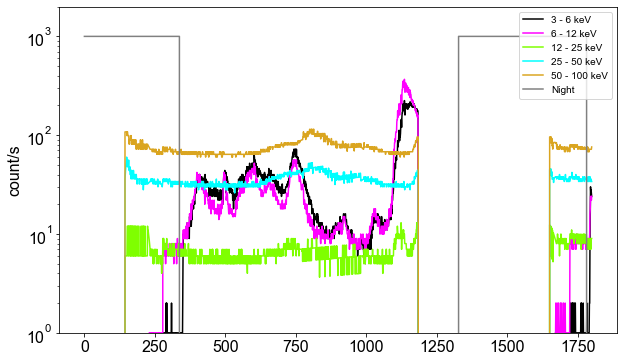

In [8]:
# Quick plot (not using the times)
plt.rcParams.update({'font.size': 16,'font.family':"sans-serif",\
                     'font.sans-serif':"Arial",'mathtext.default':"regular"})
fig = plt.figure(figsize=(10, 6))
plt.semilogy(sumdata['countrate'][:,0],color='black',\
             label=sumdata['engs_id'][0].decode('utf-8'))
plt.semilogy(sumdata['countrate'][:,1],color='magenta',\
             label=sumdata['engs_id'][1].decode('utf-8'))
plt.semilogy(sumdata['countrate'][:,2],color='chartreuse',\
             label=sumdata['engs_id'][2].decode('utf-8'))
plt.semilogy(sumdata['countrate'][:,3],color='cyan',\
             label=sumdata['engs_id'][3].decode('utf-8'))
plt.semilogy(sumdata['countrate'][:,4],color='goldenrod',\
             label=sumdata['engs_id'][4].decode('utf-8'))

plt.semilogy(sumdata['ecl_flag']*1e3,color='gray',label='Night')
plt.ylim([1,2e3])
# plt.xlim([2001,2019])
# plt.xlabel('Year')
plt.ylabel('count/s')
plt.legend(loc=1, prop={'size': 10})
fig.show()

In [9]:
# For plotting need to put into actual times not strings
# Start by putting in to astropy time format (most control)
atimes=astropy.time.Time(times, format = 'isot')
# Then convert to something matplotlib understands
mtimes = matplotlib.dates.date2num(atimes.datetime)
# The above might not be the best way of doing this....

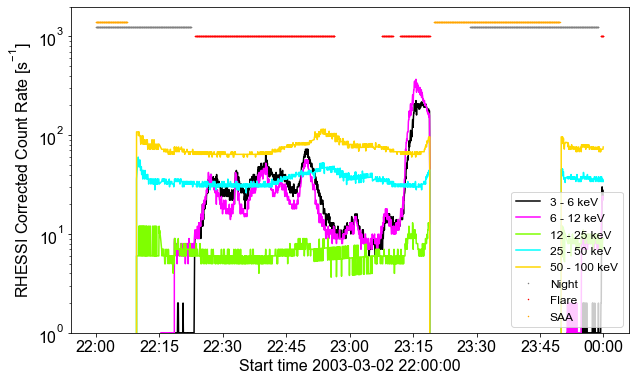

In [10]:
plt.rcParams.update({'font.size': 16,'font.family':"sans-serif",\
                     'font.sans-serif':"Arial",'mathtext.default':"regular"})
fig,ax= plt.subplots(figsize=(10, 6))
plt.plot_date(mtimes,sumdata['countrate'][:,0],'-',color='black',\
             label=sumdata['engs_id'][0].decode('utf-8'))
plt.plot_date(mtimes,sumdata['countrate'][:,1],'-',color='magenta',\
             label=sumdata['engs_id'][1].decode('utf-8'))
plt.plot_date(mtimes,sumdata['countrate'][:,2],'-',color='chartreuse',\
             label=sumdata['engs_id'][2].decode('utf-8'))
plt.plot_date(mtimes,sumdata['countrate'][:,3],'-',color='cyan',\
             label=sumdata['engs_id'][3].decode('utf-8'))
plt.plot_date(mtimes,sumdata['countrate'][:,4],'-',color='gold',\
             label=sumdata['engs_id'][4].decode('utf-8'))

# Now only plot where the flag is == 1
plt.plot_date(mtimes[sumdata['ecl_flag']==1],\
              sumdata['ecl_flag'][sumdata['ecl_flag']==1]*10**3.1,'s',color='grey',\
             label='Night',markersize=0.5)
plt.plot_date(mtimes[sumdata['flr_flag']==1],\
              sumdata['flr_flag'][sumdata['flr_flag']==1]*10**3.0,'s',color='red',\
             label='Flare',markersize=0.5)
plt.plot_date(mtimes[sumdata['saa_flag']==1],\
              sumdata['saa_flag'][sumdata['saa_flag']==1]*10**3.15,'s',color='orange',\
             label='SAA',markersize=0.5)

plt.ylim([1,2e3])
plt.yscale('log')
plt.xlabel('Start time '+atimes[0].iso[:-4])
plt.ylabel('RHESSI Corrected Count Rate [s$^{-1}$]')
plt.legend(loc=4, prop={'size': 12})
# The following should give HH:MM for the axis formate
myFmt = matplotlib.dates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
fig.show()